https://zenn.dev/thimblee/articles/ml_prml_perceptron

# 第7章パーセプトロン型学習規則

- パーセプトロンを実装してみる
- 適当なデータを放り込んで、識別境界の変化を見る
- パラメータの初期値を0と乱数でやってみる

In [296]:
import os
from typing import List

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation


In [259]:
class Perceptron:
    def __init__(self, dim=1, eta=1, init_w=None):
        self.w = self.set_init_w(dim, init_w)
        
        assert len(self.w) == dim + 1
        # 学習率
        self.eta = eta
    
    def forward(self, x):
        return np.sign((x * model.w).sum(axis=1))
        
    def update_w(self, output, y):
        # 出力と正解データが異なる場合のみパラメータを更新
        # サンプルデータをwに加える
        self.w += np.dot((output != y) * np.sign(y), x)
        
    def set_init_w(self, dim, init_w):
        if init_w is None:
            # 正規分布の乱数生成
            w = np.random.randn(dim + 1)
        else:
            w = np.zeros(dim + 1)
        return w
            


In [260]:
def get_sample(dim, n):
    x = np.random.rand(n, dim) * 2 - 1
    # バイアス項を追加
    x = np.hstack((np.ones((n, 1)), x))
    
    # ラベルは[1, -1]のどっちか
    y = np.where(np.array(x[:, 1] < x[:, 2]), 1, -1)
    return x, y

In [290]:
# 特徴ベクトルの次元数
dim = 2
# サンプル数
n = 100

x, y = get_sample(dim, n)

print(x)
print(y)

# パーセプトロンのモデル定義
eta = 0.0001
model = Perceptron(dim=dim, eta=eta)

[[ 1.00000000e+00 -7.09478505e-01  5.25897663e-01]
 [ 1.00000000e+00  4.72170002e-01 -1.92168275e-01]
 [ 1.00000000e+00  4.72984587e-01 -6.09149402e-01]
 [ 1.00000000e+00  9.70168165e-01 -1.25667688e-02]
 [ 1.00000000e+00 -9.04799841e-01  4.57587074e-01]
 [ 1.00000000e+00 -5.54494234e-02  8.56510171e-01]
 [ 1.00000000e+00  6.64449750e-01 -7.11077892e-01]
 [ 1.00000000e+00 -7.53087848e-01 -2.61075679e-01]
 [ 1.00000000e+00 -1.25822458e-01  6.00724675e-01]
 [ 1.00000000e+00  7.72262921e-03 -2.84022371e-01]
 [ 1.00000000e+00  8.15978249e-01  1.68815491e-01]
 [ 1.00000000e+00 -1.00958499e-01  5.81360242e-01]
 [ 1.00000000e+00  8.48878311e-01 -7.59402718e-01]
 [ 1.00000000e+00 -9.95074722e-01 -4.71054402e-01]
 [ 1.00000000e+00 -3.65630563e-01  2.18645843e-01]
 [ 1.00000000e+00  9.75688624e-01 -9.01383147e-01]
 [ 1.00000000e+00  3.09105591e-01 -2.23976715e-01]
 [ 1.00000000e+00 -3.46879222e-01  8.60459341e-01]
 [ 1.00000000e+00 -9.81958631e-01 -8.14580234e-01]
 [ 1.00000000e+00  2.66698830e-

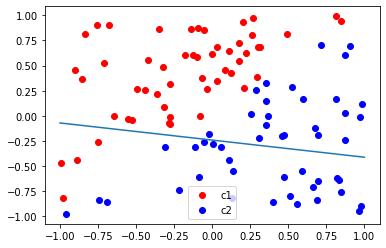

In [291]:
# サンプルを可視化してみる
# クラスで色分け
class1_cond = y >= 0
class2_cond = y < 0

plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

# 初期パラメータの識別境界を可視化
xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)

plt.legend()
plt.show()


In [292]:
# 学習回数
n_iter = 10

accuracy_l = []
w_l = []

for i in range(n_iter):
    print(f"iter: {i + 1}")
    w_l.append(list(model.w))
    output = model.forward(x)
    accuracy = np.sum(output == y) / len(y)
    print(f"accuracy: {accuracy}")
    accuracy_l.append(accuracy)

    # パラメータ更新
    model.update_w(output, y)

iter: 1
accuracy: 0.74
iter: 2
accuracy: 0.48
iter: 3
accuracy: 0.58
iter: 4
accuracy: 0.91
iter: 5
accuracy: 1.0
iter: 6
accuracy: 1.0
iter: 7
accuracy: 1.0
iter: 8
accuracy: 1.0
iter: 9
accuracy: 1.0
iter: 10
accuracy: 1.0


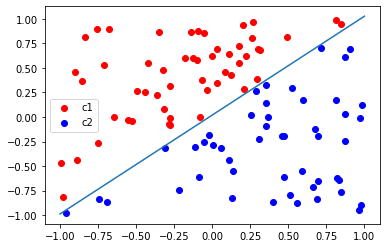

In [293]:
# 学習後の識別境界を可視化
plt.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
plt.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

xx = np.linspace(-1, 1, 20)
plt.plot(xx, (model.w[0] + model.w[1] * xx) / model.w[2] * -1)
plt.legend()
plt.show()

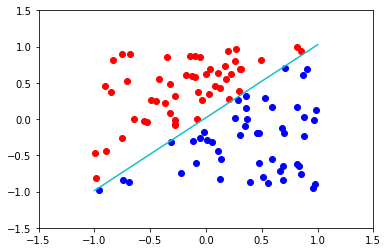

In [305]:
# パラメータの変化の様子

xx = np.linspace(-1, 1, 20)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-1.5, 1.5)

ax.scatter(x[class1_cond, 1], x[class1_cond, 2], color="r", label="c1")
ax.scatter(x[class2_cond, 1], x[class2_cond, 2], color="b", label="c2")

ims = []
for w in w_l:
    im = ax.plot(xx, (w[0] + w[1] * xx) / w[2] * -1)
    ims.append(im)
    
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat_delay=100)

ani.save("../output/parceptron_params.gif", writer="pillow")


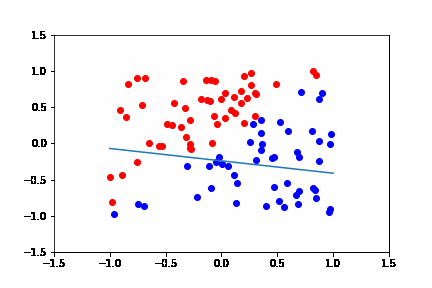